In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data\\merged_data.csv", low_memory=False)

df.head()

,X_x,Y_x,Z_x,EDA_x,HR_x,TEMP_x,id_x,id_y,X_y,Y_y,Z_y,datetime,EDA_y,HR_y,TEMP_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,-82.0,40.0,-32.0,1.594213e+09,0.0,69.0,30.85
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,-76.0,14.0,-39.0,1.594213e+09,0.0,69.0,30.85
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,-71.0,10.0,-33.0,1.594213e+09,0.0,69.0,30.85
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,-62.0,17.0,-26.0,1.594213e+09,0.0,69.0,30.85
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,-53.0,10.0,-24.0,1.594213e+09,0.0,69.0,30.85


In [5]:
import pandas as pd

# load your dataframe
df = pd.read_csv("C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data\\merged_data.csv", low_memory=False)

# drop unwanted columns
df = df.drop(['X_x', 'Y_x', 'Z_x', 'EDA_x', 'HR_x', 'TEMP_x', 'id_x'], axis=1)

# rename remaining columns
df = df.rename(columns={'id_y': 'id', 'X_y': 'X', 'Y_y': 'Y', 'Z_y': 'Z', 'EDA_y': 'EDA', 'HR_y': 'HR', 'TEMP_y': 'TEMP'})

# print the updated dataframe
df.head()


,id,X,Y,Z,datetime,EDA,HR,TEMP
0,15,-82.0,40.0,-32.0,1.594213e+09,0.0,69.0,30.85
1,15,-76.0,14.0,-39.0,1.594213e+09,0.0,69.0,30.85
2,15,-71.0,10.0,-33.0,1.594213e+09,0.0,69.0,30.85
3,15,-62.0,17.0,-26.0,1.594213e+09,0.0,69.0,30.85
4,15,-53.0,10.0,-24.0,1.594213e+09,0.0,69.0,30.85


In [7]:
df.shape

(61282153, 8)

In [10]:
import os

SAVE_PATH = "C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data"

df.to_csv(os.path.join(SAVE_PATH, "merged_data1.csv"), index=False)

In [12]:
new_df = pd.read_csv("C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data\\merged_data1.csv", low_memory=False)
new_df.head()

,id,X,Y,Z,datetime,EDA,HR,TEMP
0,15,-82.0,40.0,-32.0,1.594213e+09,0.0,69.0,30.85
1,15,-76.0,14.0,-39.0,1.594213e+09,0.0,69.0,30.85
2,15,-71.0,10.0,-33.0,1.594213e+09,0.0,69.0,30.85
3,15,-62.0,17.0,-26.0,1.594213e+09,0.0,69.0,30.85
4,15,-53.0,10.0,-24.0,1.594213e+09,0.0,69.0,30.85


In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import os
import multiprocessing
PATH = 'C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data'

df = pd.read_csv(os.path.join(PATH, 'merged_data1.csv'), dtype={'id': str})
df = df.sample(frac=0.1)

In [2]:
df.to_csv(os.path.join(PATH, 'merged_data_10.csv'), index=False)
print('Done')

Done


In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import os
import multiprocessing

# Read Files
print("Reading 1 ...")
PATH = 'C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data'

df = pd.read_csv(os.path.join(PATH, 'merged_data1.csv'), dtype={'id': str})
df['datetime'] = pd.to_datetime(df['datetime'].apply(lambda x: x * (10 ** 9)))
print("Dataframe 1 shape:", df.shape)

print("Reading 2 ...")
survey_path = 'C:\\Users\\MAC\\Downloads\\fahik\\SurveyResults.xlsx'

survey_df = pd.read_excel(survey_path, usecols=['ID', 'Start time', 'End time', 'date', 'Stress level'], dtype={'ID': str})
survey_df['Stress level'].replace('na', np.nan, inplace=True)
survey_df.dropna(inplace=True)

survey_df['Start datetime'] =  pd.to_datetime(survey_df['date'].map(str) + ' ' + survey_df['Start time'].map(str))
survey_df['End datetime'] =  pd.to_datetime(survey_df['date'].map(str) + ' ' + survey_df['End time'].map(str))
survey_df.drop(['Start time', 'End time', 'date'], axis=1, inplace=True)

# Convert SurveyResults.xlsx to GMT-00:00
print("Converting ...")
daylight = pd.to_datetime(datetime(2020, 11, 1, 0, 0))

survey_df1 = survey_df[survey_df['End datetime'] <= daylight].copy()
survey_df1['Start datetime'] = survey_df1['Start datetime'].apply(lambda x: x + timedelta(hours=5))
survey_df1['End datetime'] = survey_df1['End datetime'].apply(lambda x: x + timedelta(hours=5))

survey_df2 = survey_df.loc[survey_df['End datetime'] > daylight].copy()
survey_df2['Start datetime'] = survey_df2['Start datetime'].apply(lambda x: x + timedelta(hours=6))
survey_df2['End datetime'] = survey_df2['End datetime'].apply(lambda x: x + timedelta(hours=6))

survey_df = pd.concat([survey_df1, survey_df2], ignore_index=True)
# survey_df = survey_df.loc[survey_df['Stress level'] != 1.0]

survey_df.reset_index(drop=True, inplace=True)
print("Survey Dataframe shape:", survey_df.shape)

# Label Data
print('Labelling ...')
ids = df['id'].unique()

def parallel(id):
    new_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label'])

    sdf = df[df['id'] == id].copy()
    survey_sdf = survey_df[survey_df['ID'] == id].copy()

    for _, survey_row in survey_sdf.iterrows():
        ssdf = sdf[(sdf['datetime'] >= survey_row['Start datetime']) & (sdf['datetime'] <= survey_row['End datetime'])].copy()

        if not ssdf.empty:
            ssdf['label'] = np.repeat(survey_row['Stress level'], len(ssdf.index))
            print(f"Labeling data for survey row: {survey_row}")
            print(f"Before labeling: {ssdf}")
            new_df = pd.concat([new_df, ssdf], ignore_index=True)
            print(f"After labeling: {ssdf}")
        else:
            print(f"{survey_row['ID']} is missing label {survey_row['Stress level']} at {survey_row['Start datetime']} to {survey_row['End datetime']}")
        
    print(f"Finished parallel execution for id {id}")
    return new_df



pool = multiprocessing.Pool(len(ids))
results = pool.map(parallel, ids)
pool.close()
pool.join()

new_df = pd.concat(results, ignore_index=True)

print('Saving ...')
new_df.to_csv(os.path.join(PATH, 'merged_data_labeled.csv'), index=False)
print('Done')

print('Seperating 10% from whole dataset')
df_10_percent = new_df.sample(frac=0.1)
df_10_percent.to_csv(os.path.join(PATH, 'merged_data_labeled_10.csv'), index=False)
print('Seperating Done')

Reading 1 ...
Dataframe 1 shape: (61282153, 8)
Reading 2 ...
Converting ...
Survey Dataframe shape: (245, 4)
Labelling ...


In [94]:
import pandas as pd

df = pd.read_csv('C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data\\merged_data_labeled.csv')
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-73.0,13.0,2.0,0.454517,81.05,30.57,6B,2020-06-23 16:10:21.937499904,0.0
1,-89.0,-41.0,-17.0,0.425336,79.20,30.51,6B,2020-06-23 16:08:05.375000064,0.0
2,-42.0,-15.0,44.0,0.367454,64.42,29.93,6B,2020-06-23 15:51:32.312499968,0.0
3,-54.0,-9.0,-38.0,0.376417,81.43,30.61,6B,2020-06-23 16:10:33.906249984,0.0
4,-57.0,-9.0,31.0,0.000000,88.88,30.05,6B,2020-06-23 15:53:47.593750016,0.0
...,...,...,...,...,...,...,...,...,...
102391,15.0,69.0,29.0,0.430527,78.20,33.50,94,2020-07-07 12:52:14.000000000,2.0
102392,15.0,69.0,29.0,0.430527,77.68,31.79,94,2020-07-07 12:40:37.750000128,2.0
102393,15.0,69.0,29.0,0.430527,77.68,32.41,94,2020-07-07 12:36:33.750000128,2.0
102394,15.0,69.0,29.0,0.430527,77.68,32.41,94,2020-07-07 12:48:08.500000000,2.0


In [96]:
df['id'].unique()

array(['6B', '8B', 'CE', 'EG', '83', 'E4', '6D', 'DF', 'BG', '5C', 'F5',
       '15', '7A', '7E', '94'], dtype=object)

In [98]:
df.isnull().values.any()

False

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102396 entries, 0 to 102395
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         102396 non-null  float64
 1   Y         102396 non-null  float64
 2   Z         102396 non-null  float64
 3   EDA       102396 non-null  float64
 4   HR        102396 non-null  float64
 5   TEMP      102396 non-null  float64
 6   id        102396 non-null  object 
 7   datetime  102396 non-null  object 
 8   label     102396 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.0+ MB


In [152]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('C:\\Users\\MAC\\Downloads\\fahik\\Combined_Data\\merged_data_labeled.csv')

# Convert the 'datetime' column to a Pandas datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the year, month, day, hour, and minute from the 'datetime' column and create separate columns for them
#df['year'] = df['datetime'].dt.year
#df['month'] = df['datetime'].dt.month
#df['day'] = df['datetime'].dt.day
#df['hour'] = df['datetime'].dt.hour
#df['minute'] = df['datetime'].dt.minute

# Drop the 'datetime' column
#df.drop('datetime', axis=1, inplace=True)

# Convert the 'id' column to categorical
df['id'] = df['id'].astype('category')

df['label'] = df['label'].astype('category')

# Normalize the numerical columns using StandardScaler
scaler = StandardScaler()
df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']] = scaler.fit_transform(df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']])

# Print the information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102396 entries, 0 to 102395
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   X         102396 non-null  float64       
 1   Y         102396 non-null  float64       
 2   Z         102396 non-null  float64       
 3   EDA       102396 non-null  float64       
 4   HR        102396 non-null  float64       
 5   TEMP      102396 non-null  float64       
 6   id        102396 non-null  category      
 7   datetime  102396 non-null  datetime64[ns]
 8   label     102396 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6)
memory usage: 5.7 MB


In [153]:
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-1.393265,0.404487,-0.673563,-0.479381,-0.439740,-0.546975,6B,2020-06-23 16:10:21.937499904,0.0
1,-1.955135,-1.156538,-1.363378,-0.485248,-0.572793,-0.569990,6B,2020-06-23 16:08:05.375000064,0.0
2,-0.304643,-0.404934,0.851289,-0.496885,-1.635780,-0.792469,6B,2020-06-23 15:51:32.312499968,0.0
3,-0.726045,-0.231487,-2.125804,-0.495083,-0.412410,-0.531632,6B,2020-06-23 16:10:33.906249984,0.0
4,-0.831396,-0.231487,0.379311,-0.570764,0.123399,-0.746439,6B,2020-06-23 15:53:47.593750016,0.0
...,...,...,...,...,...,...,...,...,...
102391,1.697017,2.023327,0.306699,-0.484204,-0.644714,0.576926,94,2020-07-07 12:52:14.000000000,2.0
102392,1.697017,2.023327,0.306699,-0.484204,-0.682113,-0.079003,94,2020-07-07 12:40:37.750000128,2.0
102393,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:36:33.750000128,2.0
102394,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:48:08.500000000,2.0


In [154]:
#No stress values
(df.label == 0).sum()

30419

In [155]:
#low level stress values
(df.label == 1).sum()

7928

In [156]:
#high level stress values
(df.label == 2).sum()

64049

In [157]:
import pandas as pd
import numpy as np
from scipy import stats

# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the Z-score for each data point in each numerical column
z_scores = stats.zscore(df[num_cols])

# Define a threshold for outliers (Z-score of 3)
threshold = 3

# Identify the outlier indices
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove the outliers from the DataFrame
df = df.drop(outlier_indices[0], axis=0)

# Print the modified DataFrame
print(df)


               X         Y         Z       EDA        HR      TEMP  id  \
0      -1.393265  0.404487 -0.673563 -0.479381 -0.439740 -0.546975  6B   
1      -1.955135 -1.156538 -1.363378 -0.485248 -0.572793 -0.569990  6B   
2      -0.304643 -0.404934  0.851289 -0.496885 -1.635780 -0.792469  6B   
3      -0.726045 -0.231487 -2.125804 -0.495083 -0.412410 -0.531632  6B   
4      -0.831396 -0.231487  0.379311 -0.570764  0.123399 -0.746439  6B   
...          ...       ...       ...       ...       ...       ...  ..   
102391  1.697017  2.023327  0.306699 -0.484204 -0.644714  0.576926  94   
102392  1.697017  2.023327  0.306699 -0.484204 -0.682113 -0.079003  94   
102393  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.158819  94   
102394  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.158819  94   
102395  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.680493  94   

                            datetime label  
0      2020-06-23 16:10:21.937499904   0.0  
1      2020-06-23 16:

In [158]:
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-1.393265,0.404487,-0.673563,-0.479381,-0.439740,-0.546975,6B,2020-06-23 16:10:21.937499904,0.0
1,-1.955135,-1.156538,-1.363378,-0.485248,-0.572793,-0.569990,6B,2020-06-23 16:08:05.375000064,0.0
2,-0.304643,-0.404934,0.851289,-0.496885,-1.635780,-0.792469,6B,2020-06-23 15:51:32.312499968,0.0
3,-0.726045,-0.231487,-2.125804,-0.495083,-0.412410,-0.531632,6B,2020-06-23 16:10:33.906249984,0.0
4,-0.831396,-0.231487,0.379311,-0.570764,0.123399,-0.746439,6B,2020-06-23 15:53:47.593750016,0.0
...,...,...,...,...,...,...,...,...,...
102391,1.697017,2.023327,0.306699,-0.484204,-0.644714,0.576926,94,2020-07-07 12:52:14.000000000,2.0
102392,1.697017,2.023327,0.306699,-0.484204,-0.682113,-0.079003,94,2020-07-07 12:40:37.750000128,2.0
102393,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:36:33.750000128,2.0
102394,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:48:08.500000000,2.0


In [159]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler object
scaled_features = scaler.fit_transform(df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']])

# Create a new DataFrame with the scaled features and the remaining columns
scaled_df = pd.DataFrame(scaled_features, columns=['X_scaled', 'Y_scaled', 'Z_scaled', 'EDA_scaled', 'HR_scaled', 'TEMP_scaled'])
scaled_df[['id', 'datetime', 'label']] = df[['id', 'datetime', 'label']]


In [160]:
df.describe()

,X,Y,Z,EDA,HR,TEMP
count,95625.000000,95625.000000,95625.000000,95625.000000,95625.000000,95625.000000
mean,0.006968,-0.003040,0.023943,-0.126613,-0.100902,0.096440
std,0.965719,0.998207,0.990181,0.597837,0.866145,0.821267
min,-2.973523,-2.977734,-2.997148,-0.570764,-2.600955,-2.848479
25%,-0.761162,-0.549473,-0.673563,-0.496525,-0.720230,-0.546975
50%,-0.164176,0.057592,0.052557,-0.377954,-0.229012,0.143476
75%,0.608395,0.606842,0.851289,-0.019403,0.388786,0.818583
max,2.996340,2.977287,2.993344,2.999738,2.999505,1.693155


In [161]:
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-1.393265,0.404487,-0.673563,-0.479381,-0.439740,-0.546975,6B,2020-06-23 16:10:21.937499904,0.0
1,-1.955135,-1.156538,-1.363378,-0.485248,-0.572793,-0.569990,6B,2020-06-23 16:08:05.375000064,0.0
2,-0.304643,-0.404934,0.851289,-0.496885,-1.635780,-0.792469,6B,2020-06-23 15:51:32.312499968,0.0
3,-0.726045,-0.231487,-2.125804,-0.495083,-0.412410,-0.531632,6B,2020-06-23 16:10:33.906249984,0.0
4,-0.831396,-0.231487,0.379311,-0.570764,0.123399,-0.746439,6B,2020-06-23 15:53:47.593750016,0.0
...,...,...,...,...,...,...,...,...,...
102391,1.697017,2.023327,0.306699,-0.484204,-0.644714,0.576926,94,2020-07-07 12:52:14.000000000,2.0
102392,1.697017,2.023327,0.306699,-0.484204,-0.682113,-0.079003,94,2020-07-07 12:40:37.750000128,2.0
102393,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:36:33.750000128,2.0
102394,1.697017,2.023327,0.306699,-0.484204,-0.682113,0.158819,94,2020-07-07 12:48:08.500000000,2.0


C:\Users\MAC\AppData\Local\Temp\ipykernel_12152\483635450.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


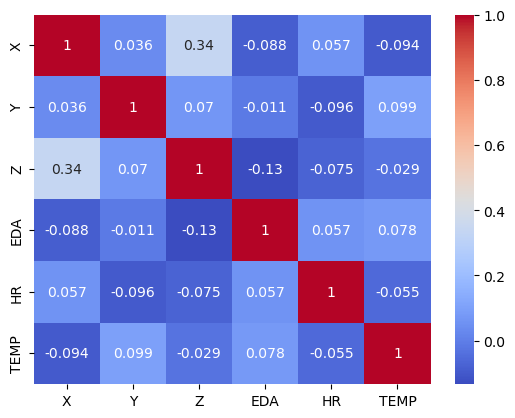

In [162]:
import pandas as pd
import seaborn as sns


# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Remove the irrelevant features by dropping the columns with low correlation
df = df.drop(['X', 'Y', 'Z'], axis=1)

# Select the highly correlated features as input for the model
X = df[['EDA', 'HR', 'TEMP']]
y = df['label']


In [164]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into X (features) and y (labels)
X = df.drop(['id', 'datetime', 'label'], axis=1)
y = df['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the label datasets
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


In [165]:
# Count the number of samples in each class
print(pd.Series(y_train).value_counts())

0.0    6142
1.0    6142
2.0    6142
Name: label, dtype: int64


In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      5977
         1.0       0.57      0.91      0.70      1481
         2.0       0.96      0.87      0.91     11667

    accuracy                           0.88     19125
   macro avg       0.80      0.90      0.83     19125
weighted avg       0.90      0.88      0.89     19125



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))